In [1]:
import pandas as pd

# Load the dataset  
df = pd.read_csv('data0404.csv', encoding='utf_8_sig')

# Group by 'Std_Endpoint' and 'Assay' and create subsets
grouped = df.groupby(['Standardized_Endpoint', 'Assay'])
subsets = {group: data for group, data in grouped}

# Create a DataFrame to store the counts
counts_df = pd.DataFrame(columns=['File', 'Number of Entries'])

# Optionally, to save these subsets as separate CSV files
for (std_endpoint,assay), subset in subsets.items():
    file_name = f'{assay}  {std_endpoint}.csv'
    subset.to_csv(file_name, index=False, encoding='utf_8_sig')
    # Add the count information to the DataFrame
    counts_df = counts_df.append({'File': file_name, 'Number of Entries': len(subset)}, ignore_index=True)

# Display the counts DataFrame
counts_df_2 = counts_df.sort_values(by = ['Number of Entries'],ascending=False)
counts_df_2

,File,Number of Entries
21,PAMPA Log Peff.csv,3462
10,Caco-2 Log Papp AB.csv,414
0,Caco-2 ER.csv,342
15,Caco-2 Log Papp BA.csv,337
9,PAMPA Log Papp.csv,305
13,Caco-2 Log Papp AB+.csv,119
11,MDCK Log Papp AB.csv,114
1,MDCK ER.csv,112
4,Caco-2 ER+.csv,111
18,Caco-2 Log Papp BA+.csv,104


In [3]:
counts_df_2.to_csv('count.csv')

In [2]:
# Group by 'Std_Endpoint' and 'Assay' and create subsets
grouped = df.groupby([ 'Assay'])
subsets = {group: data for group, data in grouped}

# Create a DataFrame to store the counts
counts_df = pd.DataFrame(columns=['File', 'Number of Entries'])

# Optionally, to save these subsets as separate CSV files
for (assay), subset in subsets.items():
    file_name = f'{assay}.csv'
    subset.to_csv(file_name, index=False, encoding='utf_8_sig')
    # Add the count information to the DataFrame
    counts_df = counts_df.append({'File': file_name, 'Number of Entries': len(subset)}, ignore_index=True)

# Display the counts DataFrame
counts_df_2 = counts_df.sort_values(by = ['Number of Entries'],ascending=False)
counts_df_2

,File,Number of Entries
3,PAMPA.csv,3767
0,Caco-2.csv,1502
1,MDCK.csv,264
2,Others.csv,98
4,RRCK.csv,7


In [8]:
counts_df_2.to_csv('count_2.csv')

In [3]:
len(counts_df_2['File'])

22

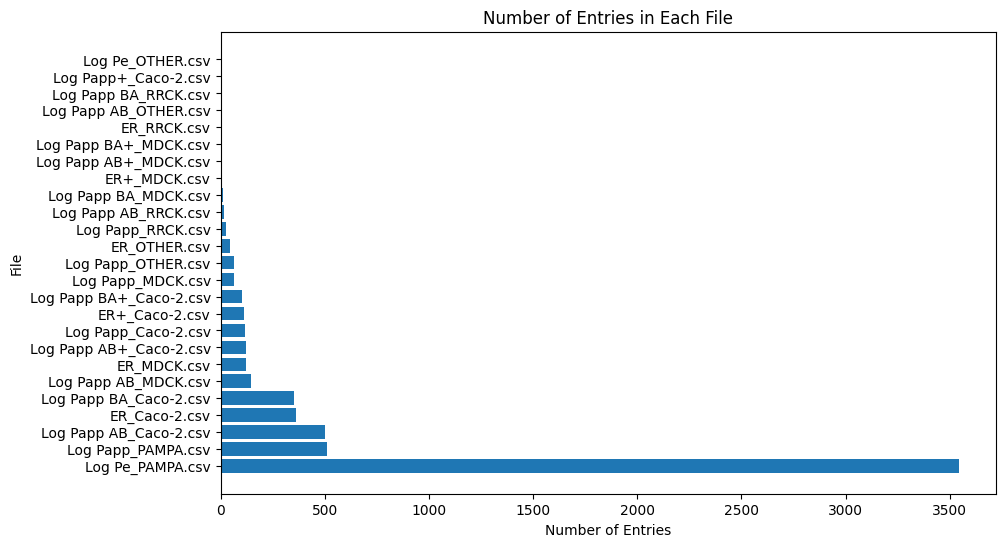

In [6]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(counts_df_2['File'], counts_df_2['Number of Entries'])
plt.xlabel('Number of Entries')
plt.ylabel('File')
plt.title('Number of Entries in Each File')
plt.show()


In [4]:
df_unq = pd.read_csv("macrocycles_uniq.csv", encoding='utf_8_sig')

In [14]:
cLogP_array = df_unq['cLogP'].to_numpy()

# Assuming array_data contains your data
with open('output.txt', 'w') as f:
    for item in cLogP_array:
        f.write("%s\n" % item)


In [16]:
import pandas as pd

# Set option to display a specific number of rows, e.g., None to display all rows
pd.set_option('display.max_rows', None)

# For arrays, you might convert them to a list for full display
array_data = df_unq['Molecular_Weight'].to_numpy()
print(list(array_data))


[386.362, 368.372, 605.702, 586.177, 558.703, 558.123, 569.722, 566.718, 566.718, 572.15, 597.2, 586.705, 623.77, 548.684, 564.727, 562.711, 550.7, 603.764, 564.727, 564.658, 582.717, 564.658, 552.647, 540.749, 548.684, 492.705, 542.721, 736.917, 722.89, 736.917, 750.944, 778.876, 460.506, 446.479, 447.463, 517.558, 524.571, 553.613, 533.557, 476.505, 445.495, 503.575, 459.522, 477.512, 436.574, 422.547, 464.628, 450.601, 408.564, 408.52, 424.519, 420.575, 440.537, 458.527, 426.554, 424.523, 423.535, 409.508, 450.601, 436.574, 394.537, 458.527, 426.51, 444.5, 436.618, 423.535, 423.535, 423.535, 422.591, 440.537, 462.551, 456.992, 494.507, 444.5, 480.48, 424.523, 424.523, 501.443, 444.544, 410.576, 443.009, 422.591, 441.525, 409.552, 733.937, 747.964, 837.058, 748.996, 812.018, 542.637, 553.664, 552.632, 568.7, 578.695, 563.659, 579.727, 589.722, 605.721, 623.739, 591.738, 910.084, 1219.543, 719.93, 600.714, 904.121, 653.902, 577.723, 511.676, 591.75, 402.575, 320.385, 548.849, 653.858,

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("macrocycles_uniq.csv", encoding='utf_8_sig')
# Divide the cLogP column into 10 equal-range bins
df['cLogP_bin'] = pd.cut(df['cLogP'], bins=20)

# Calculate the number of values in each bin
bin_counts = df['cLogP_bin'].value_counts().sort_index()

# Calculate the frequency of values in each bin
bin_frequency = df['cLogP_bin'].value_counts(normalize=True).sort_index() * 100
# Combine into a DataFrame
distribution_table = pd.DataFrame({'Count': bin_counts, 'Frequency (%)': bin_frequency})
distribution_table

,Count,Frequency (%)
"(-16.717, -15.314]",1,0.021668
"(-15.314, -13.939]",1,0.021668
"(-13.939, -12.564]",0,0.000000
"(-12.564, -11.189]",0,0.000000
"(-11.189, -9.814]",1,0.021668
"(-9.814, -8.438]",1,0.021668
"(-8.438, -7.063]",1,0.021668
"(-7.063, -5.688]",1,0.021668
"(-5.688, -4.313]",3,0.065005
"(-4.313, -2.938]",4,0.086674


In [13]:
# Set option to display a specific number of rows, e.g., None to display all rows
pd.set_option('display.max_rows', None)

# For arrays, you might convert them to a list for full display
array_data = distribution_table['Group'].to_numpy()
print(list(array_data))


['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8', 'Group 9', 'Group 10', 'Group 11', 'Group 12', 'Group 13', 'Group 14', 'Group 15', 'Group 16', 'Group 17', 'Group 18', 'Group 19', 'Group 20']


In [12]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and 'cLogP' is the column of interest

# Divide the cLogP column into 10 equal-range bins and create a group title for each bin
df['cLogP_bin'] = pd.cut(df['cLogP'], bins=20)
# Generate group titles (Group 1, Group 2, ..., Group 10)
df['Group'] = pd.cut(df['cLogP'], bins=20, labels=[f'Group {i}' for i in range(1, 21)])

# Calculate the number of values in each bin
bin_counts = df.groupby('Group')['cLogP_bin'].count()

# Calculate the frequency of values in each bin
total_count = df['cLogP_bin'].count()
bin_frequency = (bin_counts / total_count) * 100

# Combine into a DataFrame
distribution_table = pd.DataFrame({'Count': bin_counts, 'Frequency (%)': bin_frequency}).reset_index()

distribution_table


,Group,Count,Frequency (%)
0,Group 1,1,0.021668
1,Group 2,1,0.021668
2,Group 3,0,0.000000
3,Group 4,0,0.000000
4,Group 5,1,0.021668
5,Group 6,1,0.021668
6,Group 7,1,0.021668
7,Group 8,1,0.021668
8,Group 9,3,0.065005
9,Group 10,4,0.086674
